Python script to get some informations about the matrix of the 350 most variables genes in the ST transcription data

# Import

In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input

Anndata object with transcription data which are normalized, Log1p transformed, batch corrected and only the most 350 variables genes are kept.

In [10]:
adata= ad.read_h5ad("/disk2/user/cormey/outputs/Transcription_objects/034_RJ_QC")

# Output

Some differential expression analyses and some Gene Ontology analyses

In [11]:
#Remove out cells from the dataset
# Define the cell type to filter out
cell_type_to_remove = 'Out'

# Create a boolean mask for rows where the cell type is not 'out'
mask = adata.obs['annotation'] != cell_type_to_remove

# Apply the mask to subset the AnnData object
adata = adata[mask, :]

In [12]:
# Perform differential expression analysis with FDR p-value correction
sc.tl.rank_genes_groups(adata, groupby='annotation', method='wilcoxon', corr_method='benjamini-hochberg')

/disk2/user/cormey/environments/test_env/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


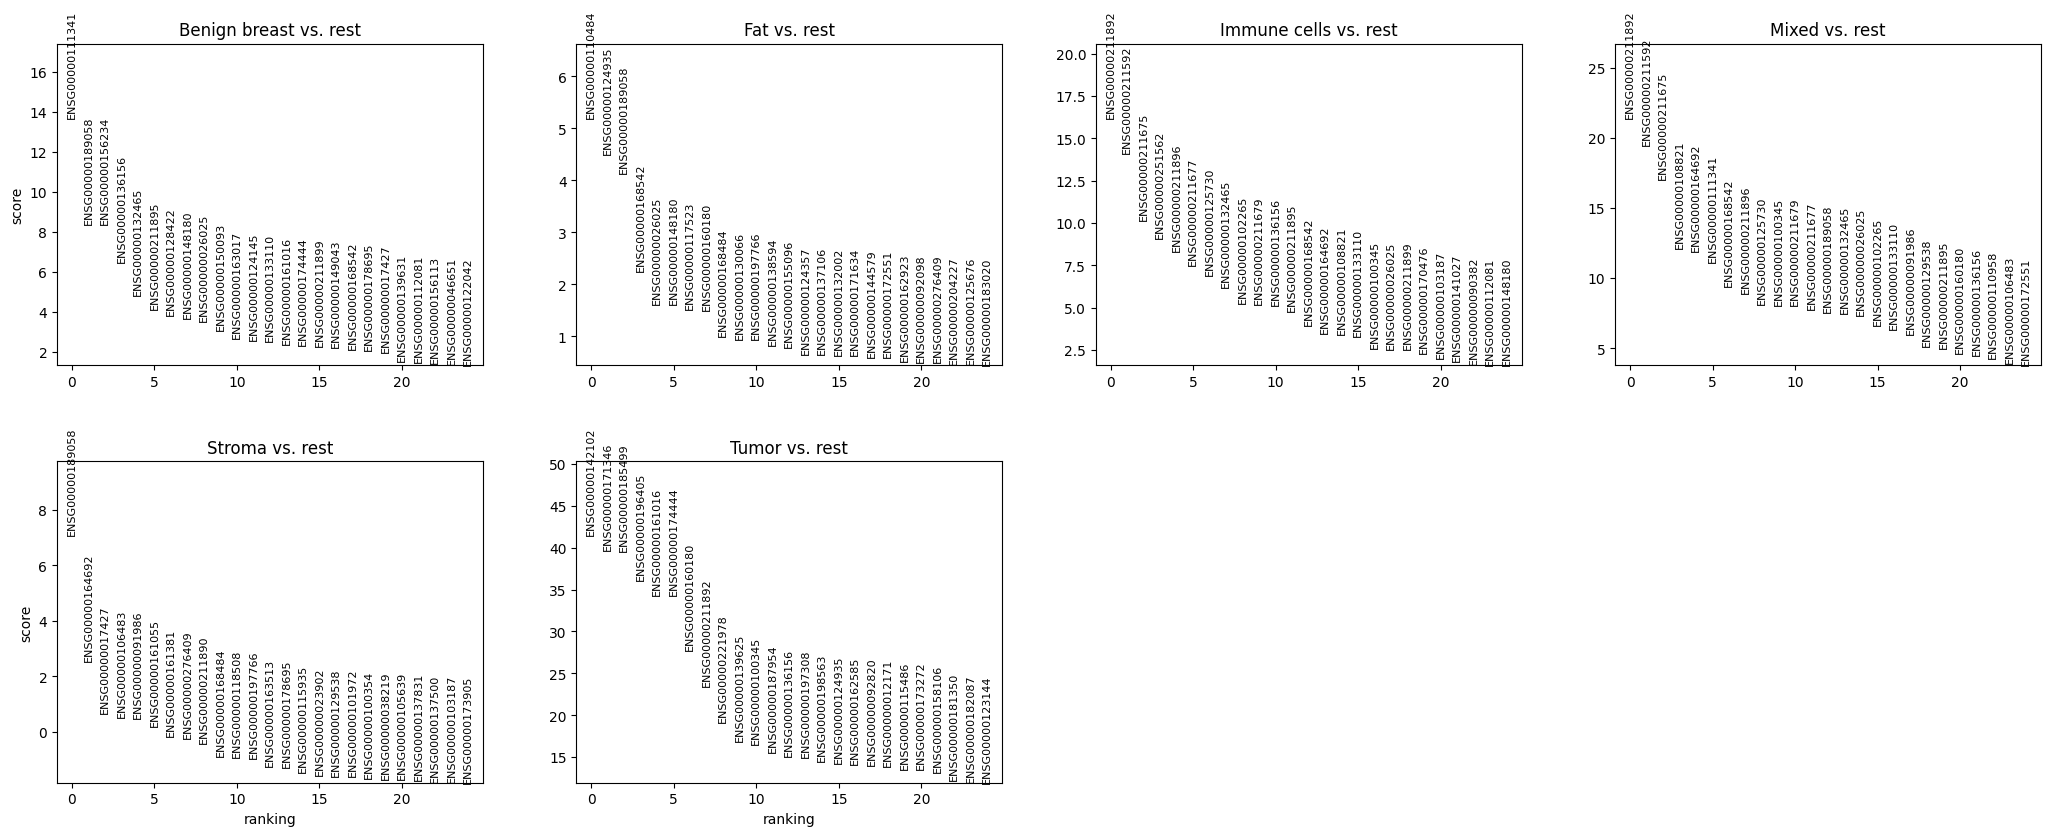

In [13]:
#Plot the most differential genes in function of the cell type
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [14]:
# Export the results
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
# Put result in a dataframe
df = pd.DataFrame(
    {group + '_' + key: result[key][group]
     for group in groups for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [15]:
pd.set_option('display.max_columns', None)
print(df.head())

  Benign breast_names  Benign breast_pvals  Benign breast_pvals_adj  \
0     ENSG00000111341         9.209647e-43             3.223376e-40   
1     ENSG00000189058         5.106485e-17             6.704764e-15   
2     ENSG00000156234         5.746940e-17             6.704764e-15   
3     ENSG00000136156         9.742821e-11             5.683312e-09   
4     ENSG00000132465         1.293921e-06             4.528723e-05   

   Benign breast_logfoldchanges        Fat_names     Fat_pvals  Fat_pvals_adj  \
0                      1.424793  ENSG00000110484  1.946293e-07       0.000023   
1                      0.744412  ENSG00000124935  6.717713e-06       0.000588   
2                      3.247843  ENSG00000189058  3.620992e-05       0.002535   
3                      1.051922  ENSG00000168542  2.391306e-02       0.697464   
4                      1.207292  ENSG00000026025  1.030519e-01       0.996098   

   Fat_logfoldchanges Immune cells_names  Immune cells_pvals  \
0            1.425874 

In [21]:
# Select and prepare some genes for GO analysis
# Thresholds
pval_adj_threshold = 0.05
logfc_threshold = 1

# Prepare gene lists for each cell type
logfc_dict = {}
gene_lists = {}
all_genes_list=[]
for group in groups:
    names = result['names'][group]
    pvals_adj = result['pvals_adj'][group]
    logfoldchanges = result['logfoldchanges'][group]
    for gene, logfc, pval_adj in zip(names, logfoldchanges, pvals_adj):
        if gene not in logfc_dict:
            logfc_dict[gene] = {}
        logfc_dict[gene][group] = logfc

    
    # Filter by adjusted p-value and log fold change
    significant_genes = names[(pvals_adj < pval_adj_threshold) & (logfoldchanges > logfc_threshold)]
    #add to a dictionnary for each group the names of significant genes
    gene_lists[group] = significant_genes.tolist()
    #add to a list all the names of significant genes
    for elem in significant_genes.tolist():
        all_genes_list.append(elem)
    #Initialisation of a dictionnary for further creation of an heatmap
    #significant_genes_dict[group] = significant_genes
       
# Display gene lists (for verification)
for group, genes in gene_lists.items():
    print(f"Group: {group}, Number of significant genes: {len(genes)}")

Group: Benign breast, Number of significant genes: 7
Group: Fat, Number of significant genes: 3
Group: Immune cells, Number of significant genes: 12
Group: Mixed, Number of significant genes: 7
Group: Stroma, Number of significant genes: 1
Group: Tumor, Number of significant genes: 112


In [22]:
len(all_genes_list)

142

In [23]:
all_genes_list

['ENSG00000111341',
 'ENSG00000156234',
 'ENSG00000136156',
 'ENSG00000132465',
 'ENSG00000211895',
 'ENSG00000128422',
 'ENSG00000150093',
 'ENSG00000110484',
 'ENSG00000124935',
 'ENSG00000189058',
 'ENSG00000211892',
 'ENSG00000211592',
 'ENSG00000211675',
 'ENSG00000251562',
 'ENSG00000211896',
 'ENSG00000211677',
 'ENSG00000125730',
 'ENSG00000132465',
 'ENSG00000102265',
 'ENSG00000211679',
 'ENSG00000136156',
 'ENSG00000211895',
 'ENSG00000211892',
 'ENSG00000211592',
 'ENSG00000211675',
 'ENSG00000211896',
 'ENSG00000211679',
 'ENSG00000049540',
 'ENSG00000170476',
 'ENSG00000189058',
 'ENSG00000142102',
 'ENSG00000171346',
 'ENSG00000185499',
 'ENSG00000196405',
 'ENSG00000161016',
 'ENSG00000174444',
 'ENSG00000221978',
 'ENSG00000139625',
 'ENSG00000187954',
 'ENSG00000197308',
 'ENSG00000198563',
 'ENSG00000162585',
 'ENSG00000092820',
 'ENSG00000012171',
 'ENSG00000115486',
 'ENSG00000173272',
 'ENSG00000158106',
 'ENSG00000181350',
 'ENSG00000116906',
 'ENSG00000162520',


In [24]:
for gene in gene_lists["Immune cells"]:
    print(gene+",")

ENSG00000211892,
ENSG00000211592,
ENSG00000211675,
ENSG00000251562,
ENSG00000211896,
ENSG00000211677,
ENSG00000125730,
ENSG00000132465,
ENSG00000102265,
ENSG00000211679,
ENSG00000136156,
ENSG00000211895,


In [25]:
for gene in gene_lists["Mixed"]:
    print(gene+",")

ENSG00000211892,
ENSG00000211592,
ENSG00000211675,
ENSG00000211896,
ENSG00000211679,
ENSG00000049540,
ENSG00000170476,


In [26]:
for gene in gene_lists["Stroma"]:
    print(gene+",")

ENSG00000189058,


In [27]:
for gene in gene_lists["Tumor"]:
    print(gene+",")

ENSG00000142102,
ENSG00000171346,
ENSG00000185499,
ENSG00000196405,
ENSG00000161016,
ENSG00000174444,
ENSG00000221978,
ENSG00000139625,
ENSG00000187954,
ENSG00000197308,
ENSG00000198563,
ENSG00000162585,
ENSG00000092820,
ENSG00000012171,
ENSG00000115486,
ENSG00000173272,
ENSG00000158106,
ENSG00000181350,
ENSG00000116906,
ENSG00000162520,
ENSG00000138495,
ENSG00000160972,
ENSG00000180902,
ENSG00000203667,
ENSG00000168350,
ENSG00000125520,
ENSG00000189180,
ENSG00000100968,
ENSG00000197622,
ENSG00000197774,
ENSG00000269893,
ENSG00000171298,
ENSG00000074842,
ENSG00000161634,
ENSG00000205560,
ENSG00000075275,
ENSG00000100083,
ENSG00000135549,
ENSG00000138074,
ENSG00000099849,
ENSG00000123143,
ENSG00000169242,
ENSG00000169592,
ENSG00000132635,
ENSG00000127616,
ENSG00000172932,
ENSG00000165283,
ENSG00000162572,
ENSG00000047457,
ENSG00000141699,
ENSG00000184209,
ENSG00000198650,
ENSG00000003147,
ENSG00000185033,
ENSG00000162736,
ENSG00000169189,
ENSG00000128159,
ENSG00000136950,
ENSG0000002135

Perform GO analysis with david : https://david.ncifcrf.gov/


# Plot an heatmap to analyse DEA

In [28]:
# Convert the dictionary to a DataFrame
logfc_df = pd.DataFrame.from_dict(logfc_dict, orient='index')

# Replace NaN values with a default value if needed, e.g., 0
logfc_df = logfc_df.fillna(0)

# Display the DataFrame
print(logfc_df)

                 Benign breast        Fat  Immune cells     Mixed    Stroma  \
ENSG00000111341       1.424793  -0.855638     -0.319584  0.381733  0.045053   
ENSG00000189058       0.744412   1.138987     -1.557355  0.111602  1.556179   
ENSG00000156234       3.247843 -24.878380     -3.110906  0.431535 -0.115598   
ENSG00000136156       1.051922  -1.667350      1.012353  0.030506 -0.878442   
ENSG00000132465       1.207292  -4.840363      1.212449  0.779754  0.369594   
...                        ...        ...           ...       ...       ...   
ENSG00000110484      -0.936223   1.425874     -0.902645 -0.264774  0.267268   
ENSG00000124935      -1.810421   1.812418     -1.177339 -0.160536  0.083658   
ENSG00000142102      -2.050338  -2.990516     -0.333381 -0.739594 -2.763177   
ENSG00000171346      -1.300240  -0.363440     -0.550835 -0.275336 -1.373233   
ENSG00000211892      -1.293892  -4.522649      3.072000  1.415966 -2.056115   

                    Tumor  
ENSG00000111341 -0.6078

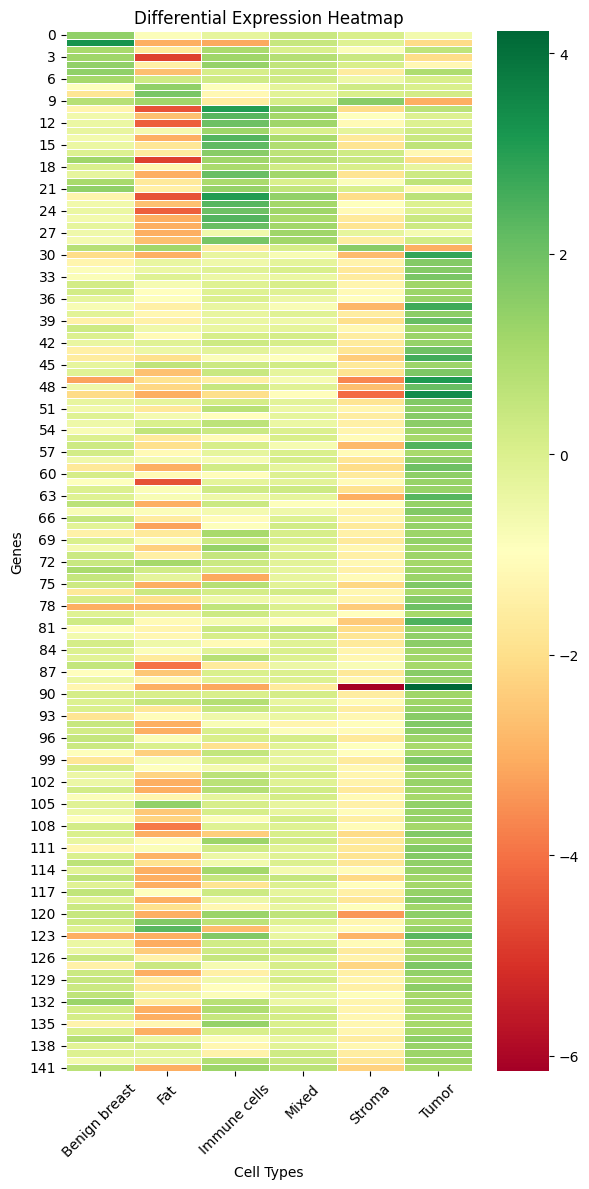

In [34]:
# Subset the DataFrame to include only the genes in all_genes_list
heatmap_data1 = logfc_df.loc[all_genes_list]
heatmap_data = np.where(heatmap_data1 < -10, -3, heatmap_data1)
# Get gene names and cell type names
genes = heatmap_data1.index.tolist()  # Gene names
cell_types = heatmap_data1.columns.tolist()  # Cell type names
# Plot the heatmap
plt.figure(figsize=(6, 12))  # Adjust the figure size as needed
sns.heatmap(heatmap_data.astype(float), cmap='RdYlGn', linewidths=.5, annot=False, fmt=".2f")
plt.title('Differential Expression Heatmap')
plt.xlabel('Cell Types')
plt.ylabel('Genes')
plt.xticks(np.arange(len(cell_types)) + 0.5, cell_types, rotation=45)
#plt.yticks(np.arange(len(genes)) + 0.5, genes, rotation=0) #if you want to display genes names

plt.tight_layout()
plt.show()

In [30]:
logfc_df.loc["ENSG00000100083"]

Benign breast    0.462926
Fat             -1.605691
Immune cells    -1.087841
Mixed           -0.055541
Stroma          -1.255980
Tumor            1.180693
Name: ENSG00000100083, dtype: float32